#Описание финальной идеи

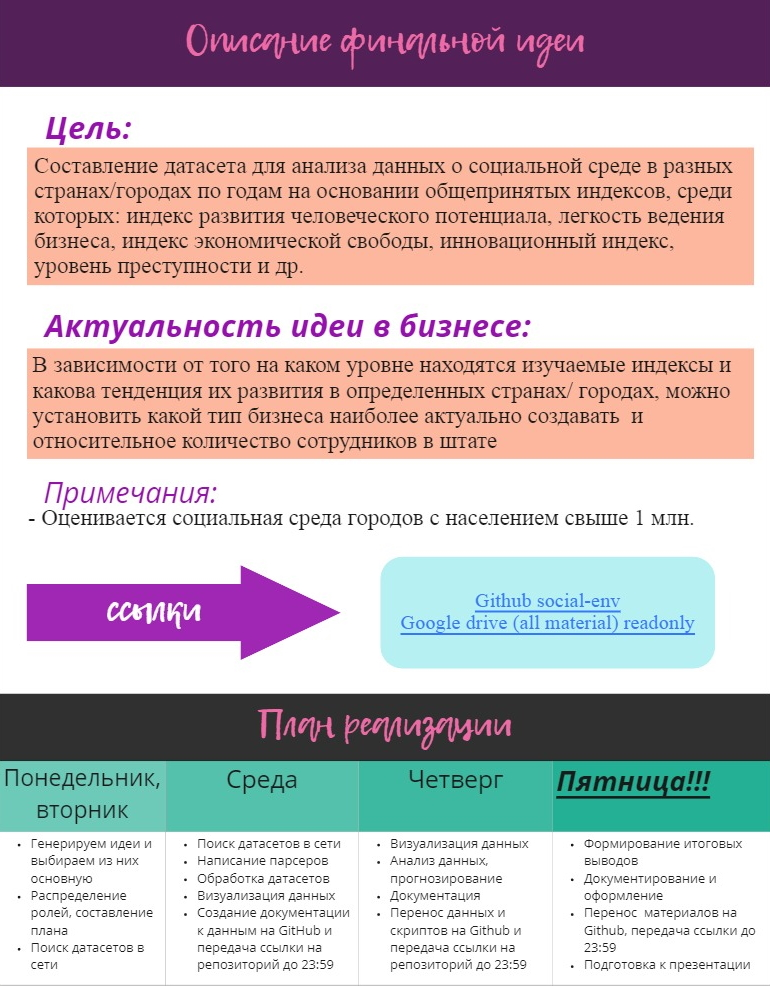

#Распределение ролей в команде

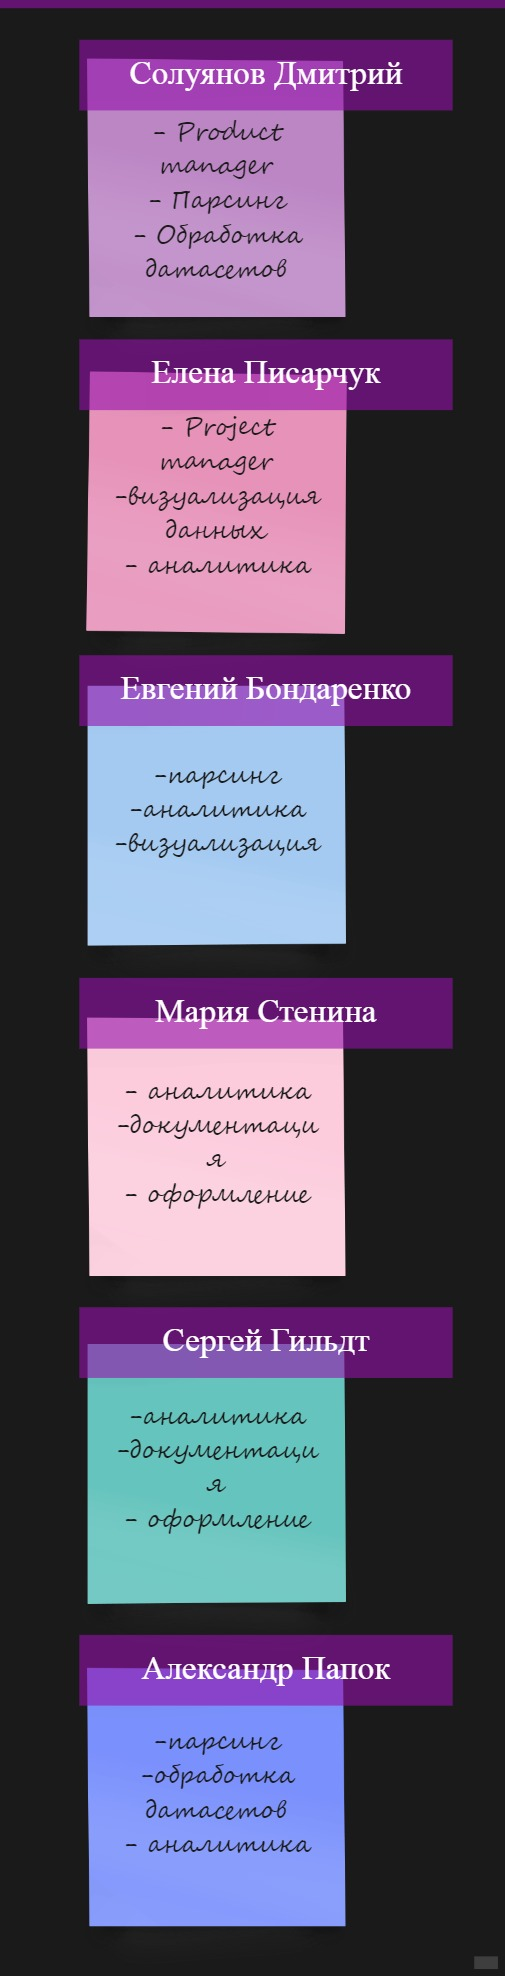

#Импорты

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd 
from bs4 import BeautifulSoup as bs
import requests
from pprint import pprint
import pandas as pd

#Загрузка и парсинг данных

##Данные о странах

###с гугл диска

Источники:
1. http://hdr.undp.org/en/data
2. https://www.heritage.org/index/explore?view=by-region-country-year
3. https://worldhappiness.report/ed/2020/
4. wikipedia.org

In [250]:
#коэффициент человеческого неравенста:
coefficient_of_human_inequality = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Coefficient of Human Inequality - коэффициент человеческого неравенства.csv', skiprows = 1)
population_total_millions = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Population, total (millions).csv', skiprows = 1)
education_index = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Education Index.csv', skiprows = 1)
#уровень убийств:
homicide_rate_per_100_000_people = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Homicide rate (per 100,000 people) -уровень убийств.csv', skiprows = 1)
human_development_index = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Human Development Index (HDI) - Индекс развития человеческого потенциала.csv', skiprows = 1)
#безработица
unemployment = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unemployment, total (% of labour force) - безработица.csv', skiprows = 1)
happiness_life_expectancy_and_other = pd.read_excel('/content/drive/My Drive/Colab Notebooks/индекс счастья, ожидаемая продолжительность жизни.xls')
#экономическая свобода, фининсовая свобода, судебная эффективность:
economic_indexes_and_other = pd.read_csv('/content/drive/My Drive/Colab Notebooks/экономическая свобода, фининсовая свобода, судебная эффективность.csv')


In [251]:
#cleaning
def first_cleaning(index):
  i = 3
  while True:
    if f'Unnamed: {i}' in list(index.columns):
      index.drop(f'Unnamed: {i}', axis=1, inplace=True)
      i+=2
    else:
      break
  return index
coefficient_of_human_inequality = first_cleaning(coefficient_of_human_inequality)
population_total_millions = first_cleaning(population_total_millions)
education_index = first_cleaning(education_index)
homicide_rate_per_100_000_people = first_cleaning(homicide_rate_per_100_000_people)
unemployment = first_cleaning(unemployment)


In [266]:
coefficient_of_human_inequality = coefficient_of_human_inequality.replace('..', 0)
population_total_millions = population_total_millions.replace('..', 0)
education_index = education_index.replace('..', 0)
homicide_rate_per_100_000_people = homicide_rate_per_100_000_people.replace('..', 0)
unemployment = unemployment.replace('..', 0)
human_development_index = human_development_index.replace('..', 0)

#объединяем всё в словарь
#countries_indexes ={'coefficient_of_human_inequality', coefficient_of_human_inequality, 'population_total_millions':population_total_millions, 'education_index': education_index, 'homicide_rate_per_100_000_people': homicide_rate_per_100_000_people, 'unemployment': unemployment, 'human_development_index': human_development_index}

###Принты шапок датасетов

In [268]:
print(coefficient_of_human_inequality.head(3))

#print(coefficient_of_human_inequality.iloc[10])

  HDI Rank (2018)      Country  2010  2011  2012  ...  2014  2015  2016  2017  2018
0             170  Afghanistan     0     0     0  ...  30.0  30.4  28.2  28.2     0
1              69      Albania  12.7  13.8  13.8  ...  13.4  13.4  12.2  10.0  10.9
2              82      Algeria     0     0     0  ...     0     0     0  20.1  19.7

[3 rows x 11 columns]


In [261]:
print(population_total_millions.head(3))
print(population_total_millions.iloc[10])

  HDI Rank (2018)      Country  1990  1995  2000  ...  2014  2015  2016  2017  2018
0             170  Afghanistan  12.4  18.1  20.8  ...  33.4  34.4  35.4  36.3  37.2
1              69      Albania   3.3   3.1   3.1  ...   2.9   2.9   2.9   2.9   2.9
2              82      Algeria  25.8  28.8  31.0  ...  38.9  39.7  40.6  41.4  42.2

[3 rows x 15 columns]
HDI Rank (2018)            87
Country            Azerbaijan
1990                      7.2
1995                      7.8
2000                      8.1
2005                      8.5
2010                      9.0
2011                      9.1
2012                      9.3
2013                      9.4
2014                      9.5
2015                      9.6
2016                      9.7
2017                      9.8
2018                      9.9
Name: 10, dtype: object


In [262]:
print(education_index.head(3))

  HDI Rank (2018)      Country   1990   1991  ...   2015   2016   2017   2018
0             170  Afghanistan  0.122  0.133  ...  0.405  0.406  0.408  0.413
1              69      Albania  0.584  0.589  ...  0.770  0.761  0.758  0.758
2              82      Algeria  0.385  0.395  ...  0.663  0.668  0.674  0.675

[3 rows x 31 columns]


In [263]:
print(homicide_rate_per_100_000_people.head())

  HDI Rank (2018)      Country 1990 1995 2000  ... 2013 2014  2015 2016 2017
0             170  Afghanistan    0    0    0  ...    0    0  10.0  6.6  7.1
1              69      Albania    0  8.3  4.2  ...  4.2  4.0   2.8  3.4  2.3
2              82      Algeria    0    0    0  ...  1.3  1.5   1.4    0    0
3              36      Andorra    0    0    0  ...  0.0  0.0   0.0    0    0
4             149       Angola    0    0    0  ...    0    0     0    0    0

[5 rows x 14 columns]


In [267]:
print(human_development_index.head())

  HDI Rank (2018)      Country   1990   1991  ...   2015   2016   2017   2018
0             170  Afghanistan  0.298  0.304  ...  0.490  0.491  0.493  0.496
1              69      Albania  0.644  0.625  ...  0.788  0.788  0.789  0.791
2              82      Algeria  0.578  0.582  ...  0.751  0.755  0.758  0.759
3              36      Andorra      0      0  ...  0.850  0.854  0.852  0.857
4             149       Angola      0      0  ...  0.565  0.570  0.576  0.574

[5 rows x 31 columns]


In [265]:
print(unemployment.head())

  HDI Rank (2018)      Country  1991  1995  2000  ...  2014  2015  2016  2017  2018
0             170  Afghanistan   3.0   3.7   3.5  ...   1.7   1.7   1.6   1.6   1.5
1              69      Albania  16.8  17.6  17.8  ...  17.5  17.1  15.2  13.8  13.9
2              82      Algeria  20.6  31.8  29.8  ...  10.2  11.2  10.2  12.0  12.2
3             149       Angola  22.6  21.2  22.9  ...   7.4   7.3   7.3   7.1   7.3
4              48    Argentina   5.4  18.8  15.0  ...   7.3   7.6   8.0   8.4   9.5

[5 rows x 15 columns]


In [120]:
print(happiness_life_expectancy_and_other.iloc[:, :5].head(3))
print('_'*100)
print(happiness_life_expectancy_and_other.iloc[:, :5].tail(3))
print('_'*100)
print(happiness_life_expectancy_and_other.iloc[0])

  Country name  year  Life Ladder  Log GDP per capita  Social support
0  Afghanistan  2008     3.723590            7.144916        0.450662
1  Afghanistan  2009     4.401778            7.314788        0.552308
2  Afghanistan  2010     4.758381            7.421525        0.539075
____________________________________________________________________________________________________
     Country name  year  Life Ladder  Log GDP per capita  Social support
1845     Zimbabwe  2017     3.638300            7.851042        0.754147
1846     Zimbabwe  2018     3.616480            7.896704        0.775388
1847     Zimbabwe  2019     2.693523            7.850442        0.759162
____________________________________________________________________________________________________
Country name                                                             Afghanistan
year                                                                            2008
Life Ladder                                             

In [121]:
print(economic_indexes_and_other.iloc[:, :4].head(3))
print('_'*100)
print(economic_indexes_and_other.iloc[:, :4].tail(3))
print('_'*100)
print(economic_indexes_and_other.iloc[0])

          Name  Index Year  Overall Score  Property Rights
0  Afghanistan        2020           54.7             48.3
1      Albania        2020           66.9             57.1
2      Algeria        2020           46.9             37.9
____________________________________________________________________________________________________
          Name  Index Year  Overall Score  Property Rights
4781     Yemen        1995           49.8             30.0
4782    Zambia        1995           55.1             50.0
4783  Zimbabwe        1995           48.5             50.0
____________________________________________________________________________________________________
Name                      Afghanistan
Index Year                       2020
Overall Score                    54.7
Property Rights                  48.3
Judicial Effectiveness             30
Government Integrity             24.8
Tax Burden                       91.4
Government Spending              79.2
Fiscal Health         

#экономическая свобода, фининсовая свобода, судебная эффективность:
###Данные с wiki

In [ ]:
main_link = 'https://en.wikipedia.org/wiki/Ease_of_doing_business_index'
r = requests.get(main_link)
soup = bs(r.text, "lxml")
table = soup.find("table",{"class": "wikitable sortable mw-datatable"})
data = []
columns_names = []

line = soup.find("table",{"class": "wikitable sortable mw-datatable"}).find('tbody').find_all('tr')
for row in line:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
line = soup.find("table",{"class": "wikitable sortable mw-datatable"}).find('tbody').find_all('tr')
for row in line:
    cols = row.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    columns_names.append([ele for ele in cols if ele])

columns_names = (pd.DataFrame(columns_names).dropna()).values.tolist()[0]
ease_of_doing_business = pd.DataFrame(data, columns = columns_names).dropna()
print(ease_of_doing_business.head(3))

  Classification Jurisdiction 2020 2019 2018 2017  ... 2011 2010 2009 2008 2007 2006
1      Very Easy  New Zealand    1    1    1    1  ...    3    2    2    2    2    1
2      Very Easy    Singapore    2    2    2    2  ...    1    1    1    1    1    2
3      Very Easy    Hong Kong    3    4    5    4  ...    2    3    4    4    5    7

[3 rows x 17 columns]


In [ ]:
main_link = 'https://en.wikipedia.org/wiki/Global_Peace_Index'
r = requests.get(main_link)
soup = bs(r.text, "lxml")
table = soup.find("table",{"class": "wikitable sortable"})
data = []
columns_names = []

line = soup.find("table",{"class": "wikitable sortable"}).find('tbody').find_all('tr')
for row in line:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
line = soup.find("table",{"class": "wikitable sortable"}).find('tbody').find_all('tr')
for row in line:
    cols = row.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    columns_names.append([ele for ele in cols if ele])

columns_names = (pd.DataFrame(columns_names).dropna()).values.tolist()[0]
global_peace_index = pd.DataFrame(data, columns = columns_names).dropna()
print(global_peace_index.head(3))

       Country 2019 rank 2019 score[12]  ... 2009 score 2008 rank 2008 score
1      Iceland         1          1.072  ...      1.160         1      1.111
2  New Zealand         2          1.221  ...      1.260         2      1.261
3     Portugal         3          1.274  ...      1.437        10      1.387

[3 rows x 25 columns]


##Данные о городах

###с гугл диска

In [269]:
#Источник https://ict.moscow/research/globalnyi-reiting-innovatsionnykh-gorodov-mira-2019/
innovation_cities_index_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/датасеты по городам/innovation_cities_index_2019.xls', skiprows = 5)

#Источник https://www.kaggle.com/blitzr/movehub-city-rankings?select=movehubcostofliving.csv
cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/датасеты по городам/cities.csv')
quality_of_life_in_cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/датасеты по городам/movehubqualityoflife.csv')
cost_of_living_in_cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/датасеты по городам/movehubcostofliving.csv')

#https://www.kaggle.com/viswanathanc/world-cities-datasets
world_cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/датасеты по городам/worldcities.csv')

###Шапки датасетов

#экономическая свобода, фининсовая свобода, судебная эффективность:

In [56]:
print(cities.head(3))

               City        Country
0           Oakland  United States
1          Oakville         Canada
2  Oaxaca de Juárez         Mexico


In [63]:
print(world_cities.head(3))

          city   city_ascii      lat  ...  capital  population          id
0        Tokyo        Tokyo  35.6850  ...  primary  35676000.0  1392685764
1     New York     New York  40.6943  ...      NaN  19354922.0  1840034016
2  Mexico City  Mexico City  19.4424  ...  primary  19028000.0  1484247881

[3 rows x 11 columns]


In [59]:
print(quality_of_life_in_cities.head(3))
print('_'*100)
print(quality_of_life_in_cities.iloc[0])

           City  Movehub Rating  ...  Quality of Life  Crime Rating
0       Caracas           65.18  ...             8.61         85.70
1  Johannesburg           84.08  ...            51.26         83.93
2     Fortaleza           80.17  ...            36.68         78.65

[3 rows x 7 columns]
____________________________________________________________________________________________________
City               Caracas
Movehub Rating       65.18
Purchase Power       11.25
Health Care          44.44
Pollution            83.45
Quality of Life       8.61
Crime Rating          85.7
Name: 0, dtype: object


In [61]:
print(cost_of_living_in_cities.head())
print('_'*100)
print(cost_of_living_in_cities.iloc[0])

       City  Cappuccino  Cinema  ...  Gasoline  Avg Rent  Avg Disposable Income
0  Lausanne        3.15   12.59  ...      1.32   1714.00                4266.11
1    Zurich        3.28   12.59  ...      1.31   2378.61                4197.55
2    Geneva        2.80   12.94  ...      1.28   2607.95                3917.72
3     Basel        3.50   11.89  ...      1.25   1649.29                3847.76
4     Perth        2.87   11.43  ...      0.97   2083.14                3358.55

[5 rows x 7 columns]
____________________________________________________________________________________________________
City                     Lausanne
Cappuccino                   3.15
Cinema                      12.59
Wine                          8.4
Gasoline                     1.32
Avg Rent                     1714
Avg Disposable Income     4266.11
Name: 0, dtype: object


In [69]:
print(innovation_cities_index_2019.head())
print('_'*100)
print(innovation_cities_index_2019.iloc[0])

   GLOBAL RANK 2019         CITY  ... ABOVE OR BELOW AVERAGE RANK 2018 Global Rank
0                 1     New York  ...                           3                4
1                 2        Tokyo  ...                           5                1
2                 3       London  ...                          -1                2
3                 4  Los Angeles  ...                           8                5
4                 5    Singapore  ...                           7                6

[5 rows x 16 columns]
____________________________________________________________________________________________________
GLOBAL RANK 2019                                  1
CITY                                       New York
GEOGRAPHY                             United States
STATE/PROVINCE                             New York
REGION                                     AMERICAS
REGION Rank                                       1
GROUPING                                        USA
City ID       